## 决策树解决回归问题

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### Decision Tree Regressor

In [4]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [5]:
dt_reg.score(X_test, y_test)

0.5933345348533772

In [6]:
dt_reg.score(X_train, y_train)

1.0

### 一个决策树回归的例子

[-1.11964304e-01 -3.27718910e-01 -3.70525375e-01 -3.15805346e-01
 -3.65982738e-01 -4.25866637e-01 -6.04994071e-01 -4.60026726e-01
 -6.50301300e-01 -6.85261198e-01 -7.23939322e-01 -8.43421773e-01
 -8.15241089e-01 -8.54363715e-01 -7.82078890e-01 -7.84089021e-01
 -8.76170678e-01 -9.06509268e-01 -9.27759590e-01 -9.33744712e-01
 -9.51207574e-01 -9.55904934e-01 -9.15200147e-01 -9.03745143e-01
 -1.07102709e+00 -9.65405113e-01 -8.40318738e-01 -8.56368749e-01
 -7.78241181e-01 -8.15494599e-01 -8.42919924e-01 -7.39968995e-01
 -8.27368949e-01 -6.54108118e-01 -6.44483971e-01 -6.12769952e-01
 -6.21779490e-01 -5.23592606e-01 -5.55322018e-01 -4.76904551e-01
 -4.41721726e-01 -3.37694686e-01 -3.37929406e-01 -3.24292715e-01
 -2.56691930e-01 -9.14916136e-02 -1.56539516e-01  2.47539088e-04
 -1.31005720e-01 -6.81299166e-02 -1.33872135e-02  7.84988056e-02
 -4.10552137e-02  1.52679967e-01  1.55387848e-01  2.25152909e-01
  2.09269131e-01  2.18491298e-01  2.09634500e-01  2.67339399e-01
  3.19682187e-01  2.41910

/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


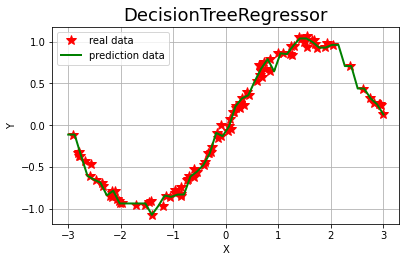

In [7]:
N = 100
x = np.random.rand(N) * 6 - 3     # [-3,3)
x.sort()
y = np.sin(x) + np.random.randn(N) * 0.05
print(y)
x = x.reshape(-1, 1)
print(x)

dt = DecisionTreeRegressor(criterion='mse', max_depth=9)
dt.fit(x, y)
x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
y_hat = dt.predict(x_test)

plt.figure(facecolor='w')
plt.plot(x, y, 'r*', ms=10, label='real data')
plt.plot(x_test, y_hat, 'g-', linewidth=2, label='prediction data')
plt.legend(loc='upper left')
plt.xlabel(u'X')
plt.ylabel(u'Y')
plt.grid(b=True)
plt.title('DecisionTreeRegressor', fontsize=18)
plt.tight_layout(2)
plt.show()

### 比较决策树的深度影响

/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


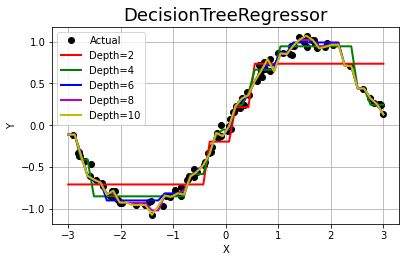

In [8]:
# 比较决策树的深度影响
depth = [2, 4, 6, 8, 10]
clr = 'rgbmy'
dtr = DecisionTreeRegressor(criterion='mse')
plt.figure(facecolor='w')
plt.plot(x, y, 'ko', ms=6, label='Actual')
x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
for d, c in zip(depth, clr):
    dtr.set_params(max_depth=d)
    dtr.fit(x, y)
    y_hat = dtr.predict(x_test)
    plt.plot(x_test, y_hat, '-', color=c, linewidth=2, label='Depth=%d' % d)
plt.legend(loc='upper left')
plt.xlabel(u'X')
plt.ylabel(u'Y')
plt.grid(b=True)
plt.title('DecisionTreeRegressor', fontsize=18)
plt.tight_layout(2)
plt.show()